In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
data = pd.read_csv('/content/sample_data/Boston.csv')

In [22]:
# Assume the target column is named 'MEDV'
X = data.drop("MEDV", axis=1)
Y = data["MEDV"]

In [23]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [24]:
data.shape

(506, 13)

In [25]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [26]:
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [28]:
# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [30]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 227.3157 - mae: 11.3104 - val_loss: 19.8198 - val_mae: 3.1486
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19.1290 - mae: 3.3261 - val_loss: 14.7292 - val_mae: 2.4669
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.4290 - mae: 2.8101 - val_loss: 15.6886 - val_mae: 2.6574
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.3065 - mae: 2.6579 - val_loss: 14.6780 - val_mae: 2.6833
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.4713 - mae: 2.3959 - val_loss: 13.0425 - val_mae: 2.4346
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.1345 - mae: 2.4870 - val_loss: 12.2321 - val_mae: 2.3463
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.8044 - mae: 2.3223 - val_loss: 12.6528 - val_mae: 2.3966
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9269 - mae: 2.4420 - val_loss: 13.2914 - val_mae: 2.4238
Epoch 9/100
404/404 ━━━━━━━━━━━━

In [32]:
# Evalute the model
mse = model.evaluate(X_test, Y_test)
print("Mean Squared Error:", mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5678 - mae: 1.9396  
Mean Squared Error: [9.340639114379883, 2.0279340744018555]


In [38]:
# Predictions
y_pred = model.predict(X_test)
print(y_pred[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[[26.037842]
 [35.85693 ]
 [15.17718 ]
 [23.807251]
 [17.168327]]


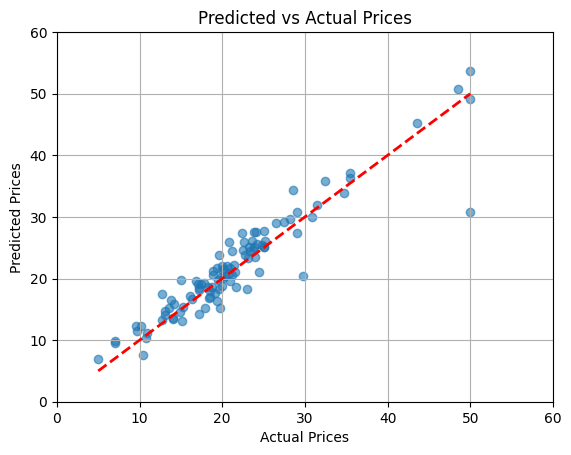

In [40]:
# Visualizing Predicted vs Actual Pricesplt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.grid()
plt.show()